Here, we are going to discuss the following topics:



1.   **Visualizing intermediate convnet outputs (i.e. intermediate activations):** It helps us to understand how successive convnet layers transform their input.
2.   **Visualizing convnets filters:** It is an useful understanding about the visual pattern that is obtained through each filter.

3. **Visualizing heatmaps of class activation:** It helps us to know which part of the image has been identified as belonging to a given class. Useful visualization for object detection problem.





## **Visualizing intermediate activations**
This gives a view into how an input is decomposed into the different filters learned by a network. As each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image.

In [1]:
#loading the models saved on Cats and Dogs dataset
from keras.models import load_model
model1 = load_model('cats_vs_dogs_v1.h5')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [2]:
#let's use the images of cats and dogs dataset
#Downloading the dataset

#Authenticating with Kaggle API
!mkdir .kaggle
!echo '{"username":"ayanbabusona","key":"faf532064a5895d0e95f400a2da88a68"}' > .kaggle/kaggle.json
!cat .kaggle/kaggle.json

#Run this to check that the Kaggle key is uploaded succesfully.
%ls /content/.kaggle/

#Get Kaggle competition list
%env KAGGLE_USERNAME= ayanbabusona
%env KAGGLE_KEY= faf532064a5895d0e95f400a2da88a68

#Get Kaggle competition files list
!kaggle competitions download -c dogs-vs-cats

#checking the downloaded data
!ls
#extracting samples
!unzip dogs-vs-cats.zip
#extracting training ssamples
!unzip train.zip
#extracting testing samples
!unzip test1.zip

#defining the small dataset to work on
import os,shutil
#original data directory
ori_train = '/content/train'
ori_test = '/content/test1'

#our dataset
base_dir ='/content/cat_vs_dog'
os.mkdir(base_dir)

#directories for the training validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
val_dir = os.path.join(base_dir, 'val')
os.mkdir(val_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Split every folder into cat and dog folder to separate the images
train_cat_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cat_dir)
train_dog_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dog_dir)
val_cat_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cat_dir)
val_dog_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dog_dir)
test_cat_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cat_dir)
test_dog_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dog_dir)

#put the images in the respective folders
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(ori_train, fname)
  dst = os.path.join(train_cat_dir, fname)
  shutil.copy(src,dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(ori_train, fname)
  dst = os.path.join(train_dog_dir, fname)
  shutil.copy(src,dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(ori_train, fname)
  dst = os.path.join(val_cat_dir, fname)
  shutil.copy(src,dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(ori_train, fname)
  dst = os.path.join(val_dog_dir, fname)
  shutil.copy(src,dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(ori_train, fname)
  dst = os.path.join(test_cat_dir, fname)
  shutil.copy(src,dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(ori_train, fname)
  dst = os.path.join(test_dog_dir, fname)
  shutil.copy(src,dst)

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [3]:
#Preprocessing a single image
img_path ='/content/cat_vs_dog/test/cats/cat.1600.jpg'
from keras.preprocessing import image #Preprocess an image into a 4D tensor
import numpy as np

img = image.load_img(img_path, target_size=(200,200))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /=255

print(img_tensor.shape)

(1, 200, 200, 3)


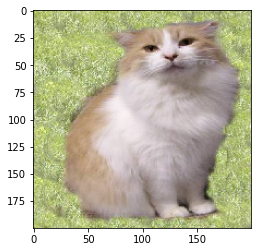

In [4]:
#displaying the test picture
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In order to extract feature maps we want to look at, we will create a Keras model that takes batches of images as input and outputs the activation of all convolution and pooling layers with the help of Keras class `Model` instantiated with input and output tensor. 

In [5]:
#Instantiating a model from an input tensor and a list of output tensors
from keras import models
layer_outputs = [layer.output for layer in model1.layers[:8]] #extracts the outputs of top eight layers
activation_model = models.Model(inputs=model1.input, outputs=layer_outputs)

In [6]:
#Running the model in predict mode
activations = activation_model.predict(img_tensor) #Returns a list of five Numpy arrays: one array per layer activation
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 198, 198, 32)


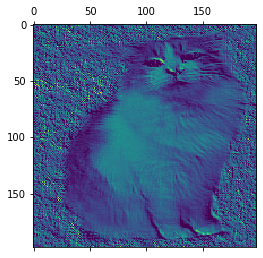

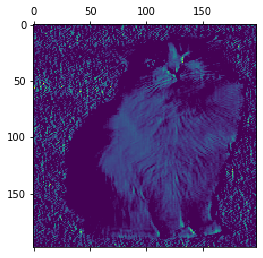

In [7]:
#Visualizing the fourth and seven channel respectively
plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')
plt.matshow(first_layer_activation[0,:,:,7], cmap='viridis')

Let's plot a complete visualization of all the activations in the network. We will extract and plot every channel in each of the eight activation maps and we will stack the results in one big image tensor, with channels stack side by side.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


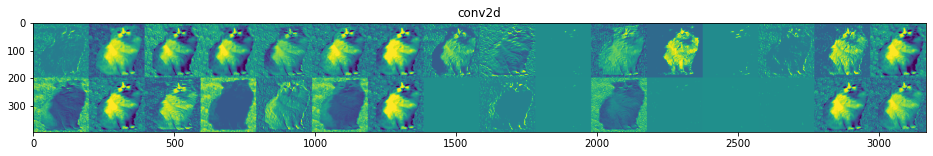

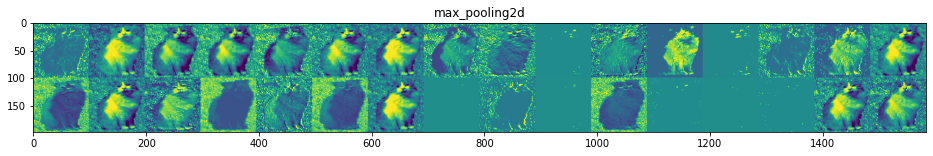

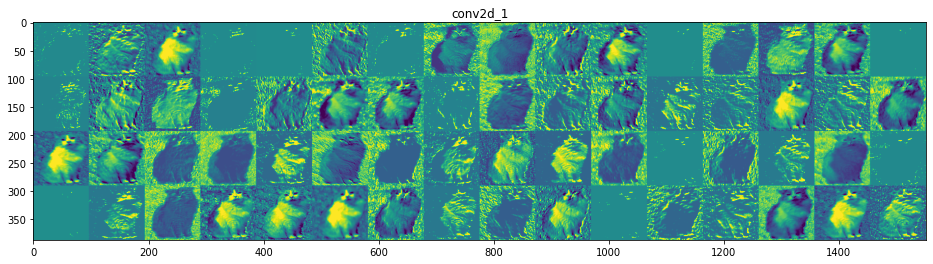

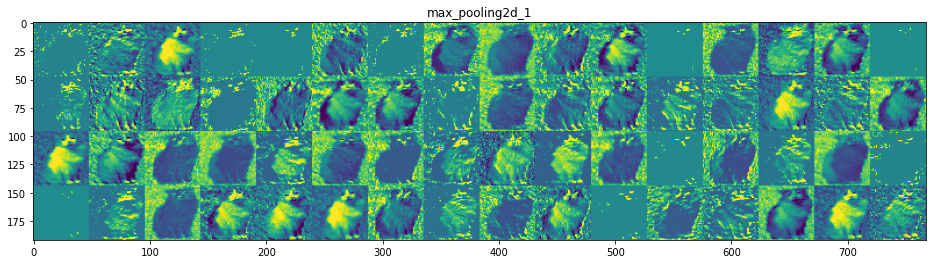

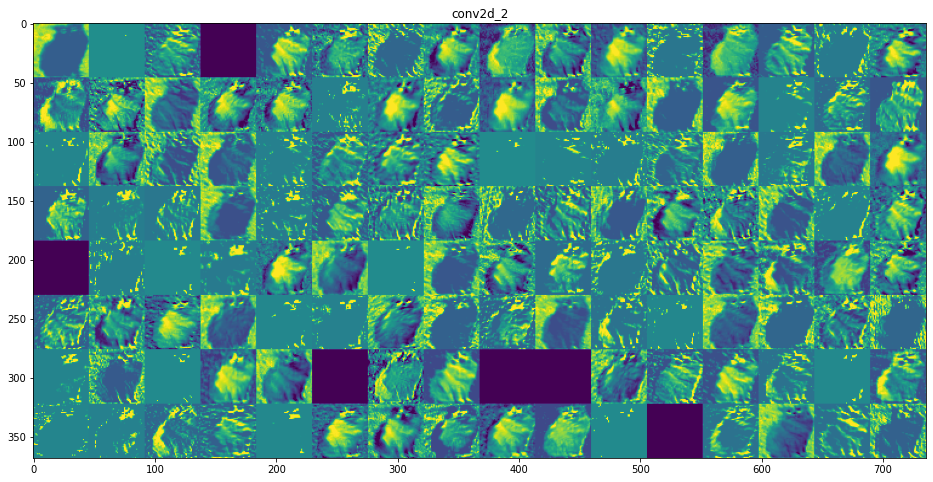

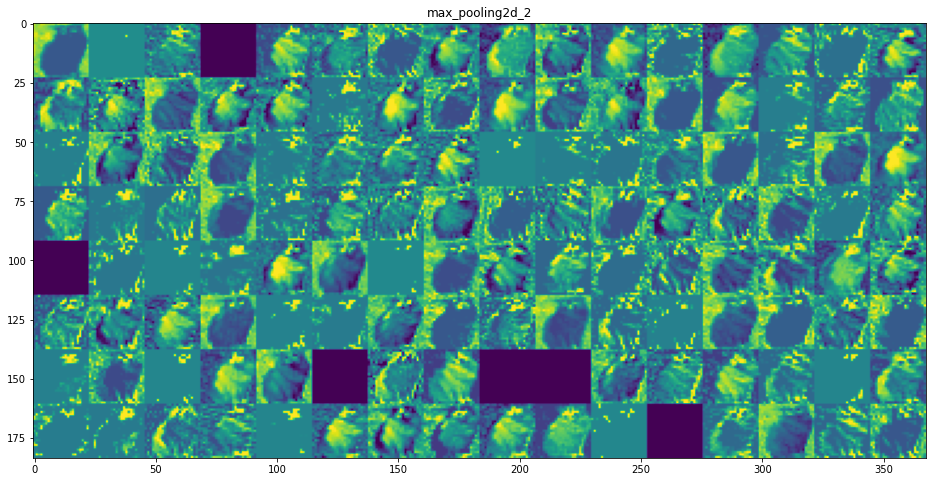

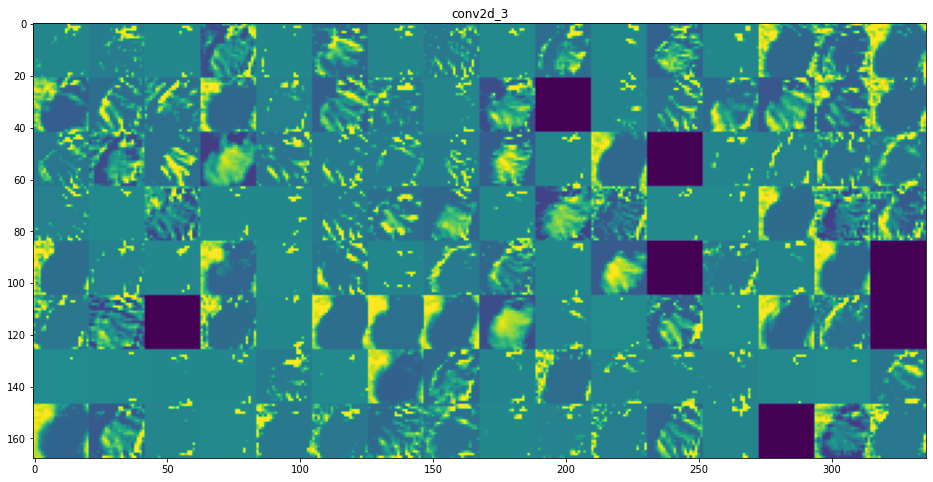

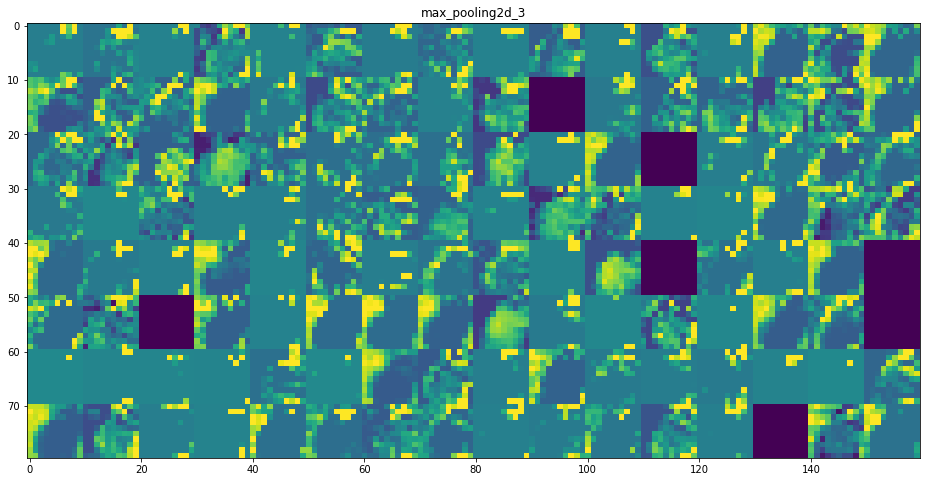

In [8]:
#Visualizing every channel in every intermediate activation
layer_names=[]                         # Name of the layers
for layer in model1.layers[:8]:        # so we cam have them
  layer_names.append(layer.name)       # as a part of our plot

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): #displays the feature maps
  n_features = layer_activation.shape[-1] # no.of features in the map
  size = layer_activation.shape[1] # The feature map has shape (1, size, size, n_features)
  n_cols = n_features//images_per_row # Tiles the activation channels in this matrix
  display_grid = np.zeros((size*n_cols, images_per_row*size))

  for col in range(n_cols): # Tiles each big filter into a big horizontal grid
    for row in range(images_per_row):
      channel_image = layer_activation[0,:,:,col*images_per_row+row]
      channel_image -=channel_image.mean() #Post processes the feature to make it visually palatable
      channel_image /=channel_image.std()
      channel_image *=64
      channel_image +=128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col*size : (col+1)*size, row*size : (row+1)*size] = channel_image #displays the grid

  scale = 1./size
  plt.figure(figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid,aspect='auto', cmap='viridis')


## **Visualizing Convnet Filters**
This can be done with gradient ascent in input space. The process is simple. We will build a loss function that maximizes the value of a given filter in a given convolution layer.

Then we will use SGD to adjust the values of the input image so as to maximize this activation value.





In [16]:
#defining the loss tensor for filter visualization
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

model = VGG16(weights='imagenet', include_top=False)
layer_name='block3_conv1'
filter_index=0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,:,filter_index])

In [17]:
#Obtaining the gradient of the loss with regard to the input
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
grads = K.gradients(loss, model.input)[0]
# The call to gradients returns a list of tensors (of size 1 in this case). Hence we keep only the first element

In [18]:
#Gradient normalization trick
grads /= (K.sqrt(K.mean(K.square(grads)))+1e-5) #Adding 1e-5 for avoiding zero division error.

In [19]:
#Fetching Numpy output values for given Numpy input values
iterate = K.function([model.input],[loss,grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1,200,200,3))])

In [20]:
#Loss maximization via SGD
input_img_data = np.random.random((1,200,200,3))*20+128 #starts from a grey image with some noise
step = 1 #magnitude of each gradient update
for i in range(40):
  loss_value, grads_value = iterate([input_img_data]) #compute the loss and gradient
  input_img_data+= grads_value*step #adjust the input image in a direction that optimize the loss


In [21]:
#Utility function to convert a tensor into a valid image
def deprocess_image(x):
  #normalizes the tensor
  x-=x.mean()
  x/=(x.std()+1e-5)
  x*=0.1

  #clip to [0,1]
  x+=0.5
  x=np.clip(x,0,1)

  #converts to an RGB array
  x*=255
  x=np.clip(x,0,255).astype('uint8')
  return x

Congratulations!!!
Now we have all the pieces. Let's define a python function which takes input the layer names and the filter index and return the pattern

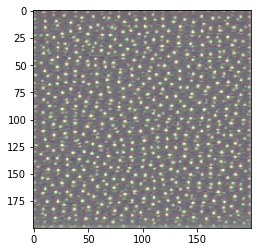

In [23]:
#Function to generate filter visualizations
def generate_pattern(layer_name, filter_index, size=200):
  #build a loss function that optimizes the activation of the nth
  #filter of the layer under consideration
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:,:,:,filter_index])

  grads = K.gradients(loss, model.input)[0] 
  grads /= (K.sqrt(K.mean(K.square(grads)))+1e-5) 
  
  iterate = K.function([model.input], [loss,grads]) 
  input_img_data = np.random.random((1,size,size,3))*20+128

  step =1
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value*step

  img = input_img_data[0]
  return deprocess_image(img)

plt.imshow(generate_pattern('block3_conv1',0))

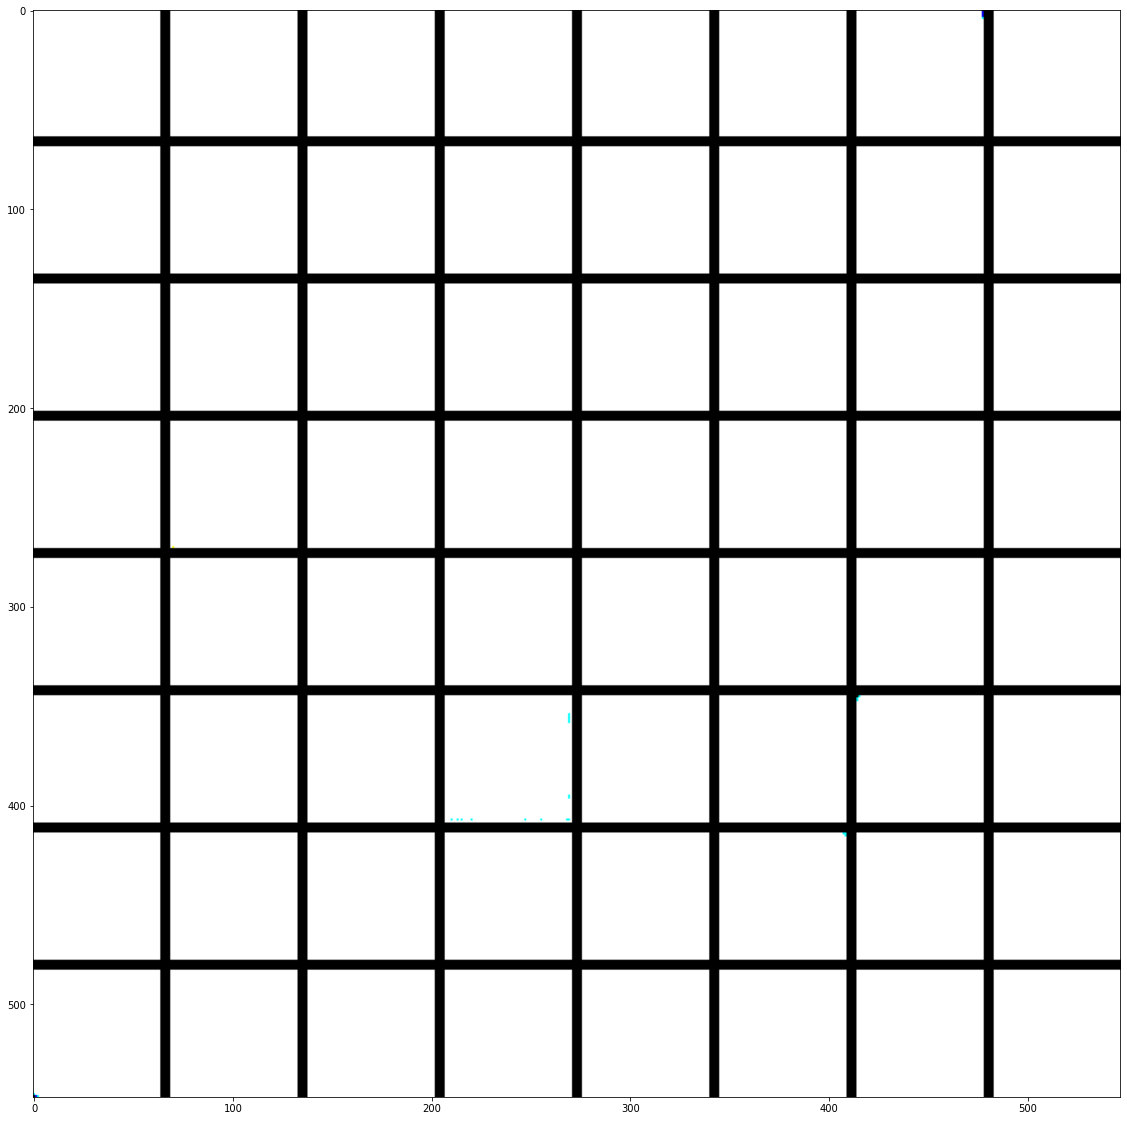

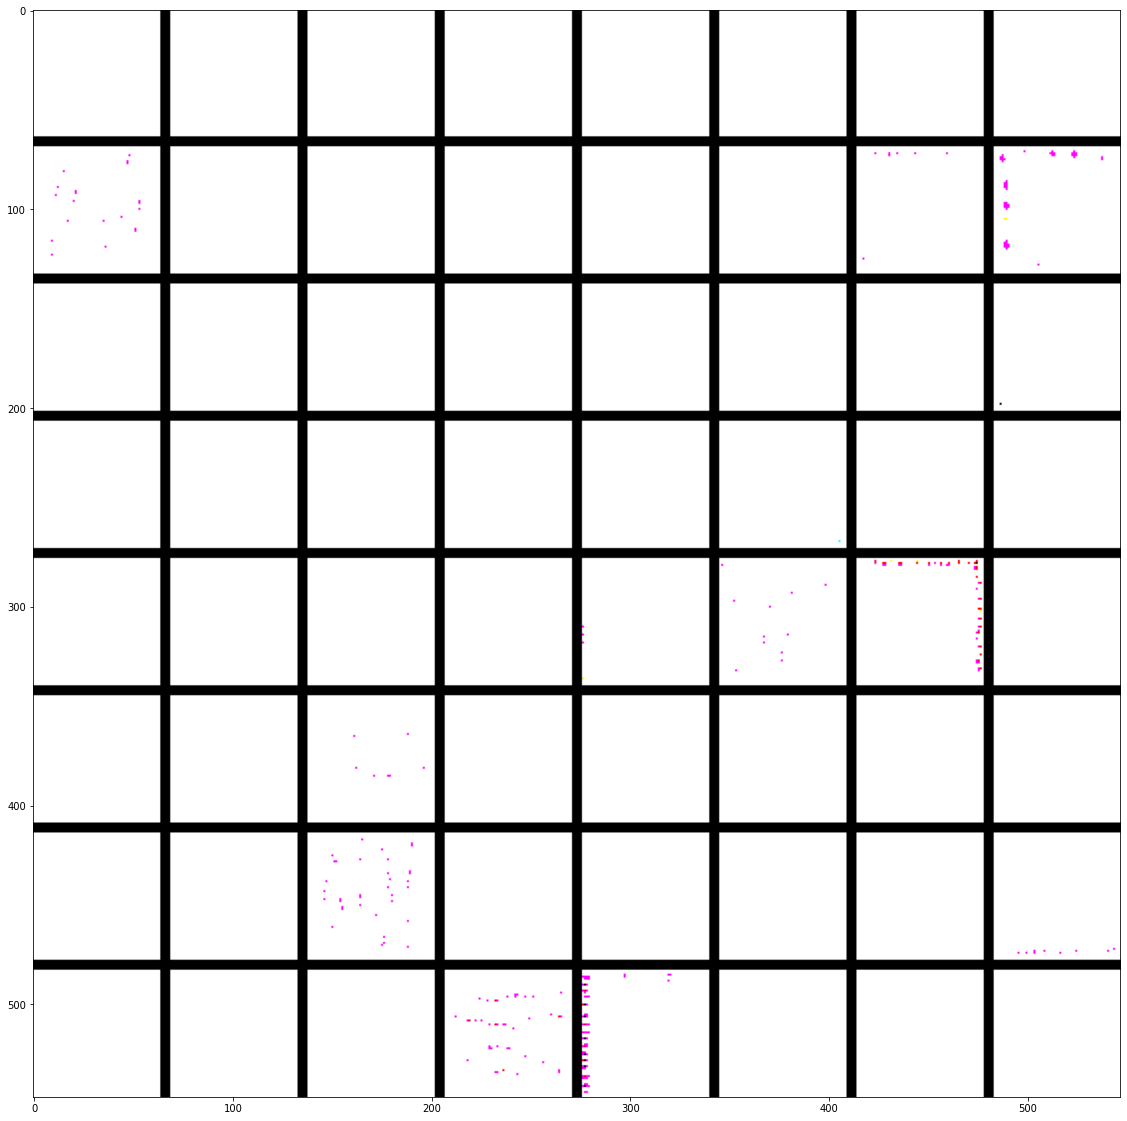

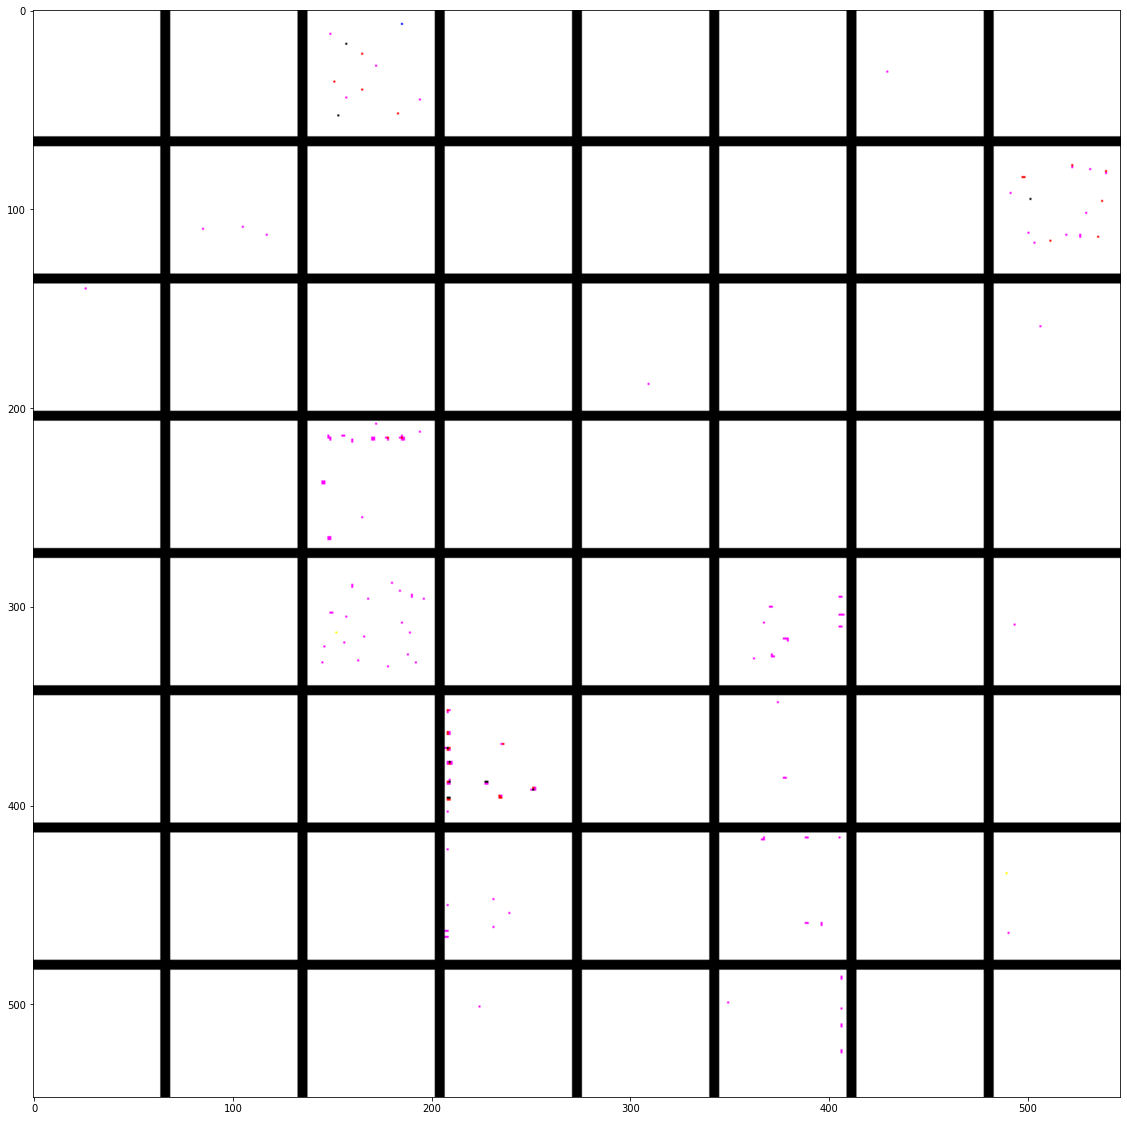

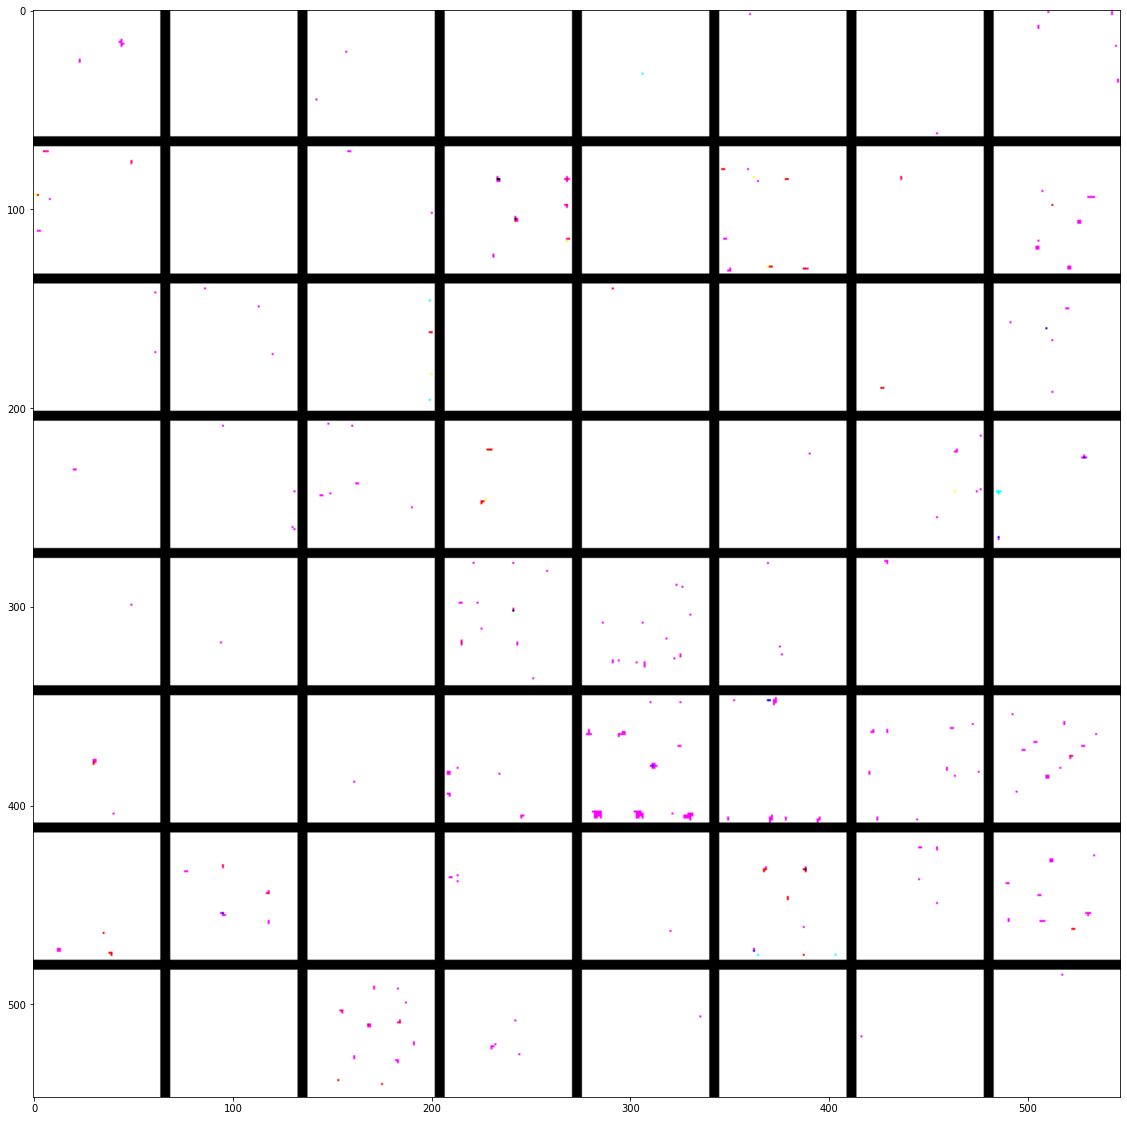

In [24]:
#Generating a grid of all filter response pattern in a layer
layer_name = ['block1_conv1','block2_conv2','block3_conv1', 'block4_conv1']
size = 64
margin = 5

results = np.zeros((8*size+7*margin, 8*size+7*margin, 3)) #empty image to store the results

for k in layer_name:
  for i in range(8):
    for j in range(8):
      filter_img = generate_pattern(k, i+(j*8), size=size) #generates the pattern for the i+j*8th filter of the layer

      #put the results into the empty image grid
      horizontal_start = i*size + i*margin
      horizontal_end = horizontal_start+size
      vertical_start = j*size + j*margin
      vertical_end = vertical_start + size
      results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

  #display
  plt.figure(figsize=(20,20))
  plt.imshow(results)

## **Visualizing heatmaps of the class activation**


In [27]:
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 5s 0us/step


In [29]:
img = image.load_img(img_path, target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
x = preprocess_input(img_tensor)

In [30]:
preds = model.predict(x)
print('Predicted:',  decode_predictions(preds, top=3)[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02123394', 'Persian_cat', 0.56079537), ('n02123045', 'tabby', 0.066436395), ('n02112018', 'Pomeranian', 0.06615101)]


In [32]:
np.argmax(preds[0])

283

In [43]:
#setting up the Grad-CAM algorithm
cat = model.output[:,283] #cat entry in the prediction vector
last_conv_layer = model.get_layer('block5_conv3') #output feature map
grads = K.gradients(cat,last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2)) #vector of shape (512,) where each entry is the mean intensity of the gradient 
print(pooled_grads.shape)                                           #over a specific heatmap chanenl
iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
print(pooled_grads_value.shape, conv_layer_output_value[:,:,1].shape)
for i in range(512):
  conv_layer_output_value[:,:,i] *= pooled_grads_value[i] # multiplies each channel in the feature map array by
                                                       #how important the channel is regards to the  class
heatmap = np.mean(conv_layer_output_value, axis=-1)

(512,)
(512,) (14, 14)


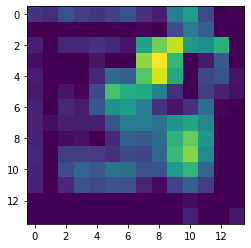

In [44]:
#Heatmap post-processing i.e. Normalization
heatmap = np.maximum(heatmap, 0)
heatmap/= np.max(heatmap)
plt.imshow(heatmap)

In [45]:
#Superimposing the heatmap with the original picture
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0])) #resize heatmap to be the same size as the original image
heatmap = np.uint8(255*heatmap) #converts the heatmap to RGB
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap*0.4 + img

cv2.imwrite('grad_cam.jpg',superimposed_img)

True